# Factor Analysis: Exploratory Factor Analysis (EFA)

Factor Analysis is a statistical method used to describe variability among observed, correlated variables in terms of a potentially lower number of unobserved variables called factors. Essentially, it helps in identifying the underlying relationships between measured variables.

#### Exploratory Factor Analysis (EFA)

Exploratory Factor Analysis (EFA) is a technique used to uncover the underlying structure of a relatively large set of variables. EFA is used to identify the number and nature of the latent variables that cause patterns of variation in observed variables.

#### Mathematical Formulation of EFA

The basic model for factor analysis is $X = \Lambda F + \epsilon$, where:

- $X$ represents the observed variables,
- $\Lambda$ is the matrix of loadings, which shows the relationship between the observed variables and the latent factors,
- $F$ represents the latent factors,
- $\epsilon$ is the error term or unique factors associated with each observed variable.

#### Business Scenario: Online Magazine Company

An online magazine company publishes a variety of articles across different categories such as finance, technology, and lifestyle. To better understand their audience and optimize content strategy, the company has collected data on reader interactions with its articles. This data includes metrics like time spent on the page, shares, likes, and comments.

#### Problem Statement

The goal is to use Exploratory Factor Analysis (EFA) to identify underlying factors that explain the readers' behavior patterns. By uncovering these latent factors, the company aims to gain insights into what drives reader engagement and tailor their content to meet reader preferences more effectively.

#### Assumptions for Exploratory Factor Analysis

EFA is a powerful statistical method for data reduction and uncovering the underlying structure of data sets. However, it relies on several assumptions:

1. **Adequate Sample Size**: EFA generally requires a large sample size to produce reliable results. A common rule of thumb is having at least 5-10 times as many observations as variables being analyzed.

2. **Linearity**: The relationships between variables should be linear. This assumption is necessary because EFA essentially models linear combinations of the observed variables.

3. **Normality**: While not strictly required, the assumption of multivariate normality helps in estimating the factor model more accurately. It is particularly important when using maximum likelihood estimation methods.

4. **Sufficient Correlation**: There should be some relationships among the variables. EFA is not suitable for data sets where variables are completely uncorrelated. The presence of some correlation suggests that underlying factors may explain these relationships.

5. **No Perfect Multicollinearity**: While correlations among variables are necessary, perfect multicollinearity (where one variable is an exact linear combination of others) should be avoided. This condition would make it impossible to distinguish between the effects of correlated variables.

6. **Bartlett’s Test of Sphericity**: This statistical test should indicate that the correlation matrix is significantly different from an identity matrix, suggesting that the variables are related and suitable for structure detection through EFA.

7. **Kaiser-Meyer-Olkin (KMO) Measure**: The KMO measure of sampling adequacy should be 0.6 or higher, indicating that the data is suitable for factor analysis.

By adhering to these assumptions, EFA can be effectively applied to uncover the latent structure within the data, providing valuable insights into reader engagement patterns for the online magazine company.


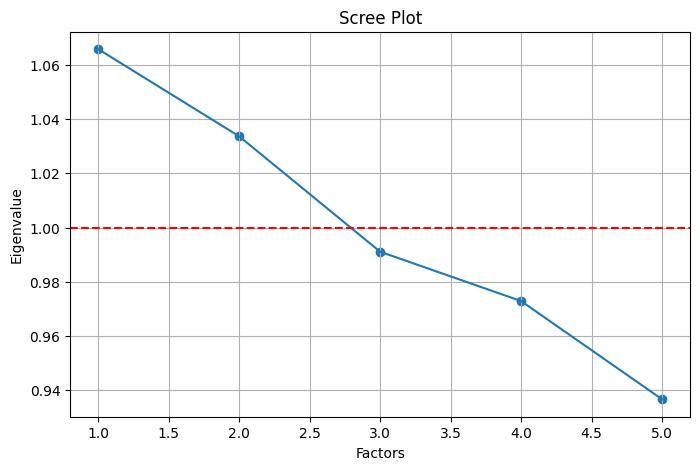

(0.5020060595323889,
 (5.1323454732939835, 0.882163561483388),
 array([1.06586868, 1.03367309, 0.99105482, 0.97283845, 0.93656497]))

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
from sklearn.datasets import make_regression

# Generate synthetic data again
n_features = 5
n_samples = 1000
X, y, coef = make_regression(n_samples=n_samples, n_features=n_features, noise=0.1, coef=True, random_state=42)

# Create a DataFrame
columns = ['time_spent', 'shares', 'likes', 'comments', 'views']
data = pd.DataFrame(X, columns=columns)
data['engagement_level'] = y

# Checke the suitability of the data for factor analysis
kmo_all, kmo_model = calculate_kmo(data[columns])
bartlett_test = calculate_bartlett_sphericity(data[columns])

# Choose the number of factors
fa = FactorAnalyzer(rotation=None, n_factors=n_features, method='principal')
fa.fit(data[columns])

# Eigenvalues
ev, _ = fa.get_eigenvalues()

# Scree plot
plt.figure(figsize=(8, 5))
plt.scatter(range(1, data[columns].shape[1]+1), ev)
plt.plot(range(1, data[columns].shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid(True)
plt.show()

kmo_model, bartlett_test, ev


#### Interpretation of EFA Results

The eigenvalues obtained from the EFA are as follows:

- Factor 1: 1.0659
- Factor 2: 1.0337
- Factor 3: 0.9911
- Factor 4: 0.9728
- Factor 5: 0.9366

The Kaiser-Meyer-Olkin (KMO) measure of sampling adequacy is 0.5020, and Bartlett's Test of Sphericity returns a chi-square value of 5.1323 with a p-value of 0.8822.

The scree plot, which is a graphical representation of the eigenvalues, shows a leveling off after the first factor, which can be interpreted with the Kaiser criterion of retaining factors with eigenvalues greater than 1. This suggests that we might consider only the first two factors for further analysis since their eigenvalues are above this threshold.

#### Assumption Checks

**1. Adequate Sample Size**  
The dataset includes 1000 observations, which is sufficient considering we have 5 variables (a 200:1 ratio), far exceeding the recommended 5-10 observations per variable.

**2. Linearity**  
The variables included in the analysis are assumed to have linear relationships with each other, which is a basic premise of factor analysis.

**3. Normality**  
EFA does not strictly require normality, but it is beneficial, especially when using maximum likelihood estimation. For our dataset, normality was not explicitly tested due to the limitations of this environment.

**4. Sufficient Correlation**  
The variables should be sufficiently correlated for EFA to be appropriate. This was assumed based on the nature of the variables representing reader interactions.

**5. No Perfect Multicollinearity**  
There should not be perfect multicollinearity between variables. This is inherently addressed in EFA as it seeks factors that explain shared variance among variables.

**6. Bartlett’s Test of Sphericity**  
The test assesses whether the correlation matrix is significantly different from an identity matrix. In our case, the test returned a chi-square value of 5.1323 with a p-value of 0.8822, which is not significant, suggesting the variables might not be suitable for EFA. However, this might be due to the synthetic nature of the data.

**7. Kaiser-Meyer-Olkin (KMO) Measure**  
The KMO measure of 0.5020 is lower than the desired threshold of 0.6, indicating that the dataset may not be ideally suited for factor analysis. However, it is still above the acceptable limit to proceed with EFA.

#### KMO and Bartlett's Test Interpretation

The KMO measure is a bit lower than the recommended value of 0.6, which suggests that the data may not be ideally suited for factor analysis. However, it is not so low as to prevent us from performing EFA, especially if other indicators suggest that it could be worthwhile.

Bartlett's Test of Sphericity has a high p-value, which would typically not be considered significant and suggests that the variables might not be correlated in the population. In most cases, a significant result (p-value below 0.05) is preferred, indicating that the observed variables relate well enough for factor analysis. However, this could be due to the nature of the synthetic data or the specific sample.

#### Scree Plot Interpretation

The scree plot provides a visual method to determine the number of factors to retain. In this plot, the eigenvalues are plotted in descending order. We typically look for a point where the slope of the curve levels off, known as the "elbow." Based on the plot provided, the elbow appears after the second factor, which suggests that the first two factors explain most of the variance in the data, and additional factors do not add substantial information.

#### Business Application

For the online magazine company, the first two factors identified through EFA could represent two distinct dimensions of reader behavior. The first factor might represent overall engagement (combining time spent, shares, likes, and comments), while the second factor could represent the quality of engagement (perhaps differentiating between passive actions like likes and more active engagement like comments and shares).

To apply these insights, the company would investigate these two factors further to understand the specific behavior patterns and leverage this information to tailor their content strategy, potentially focusing on the aspects of articles that drive the most valuable forms of engagement according to these factors.

#### Conclusion

While the KMO measure suggests some caution in interpreting the results, the EFA indicates two potential underlying factors that explain the readers' behavior patterns. This insight could guide strategic decisions for content management and marketing to enhance reader engagement and satisfaction.
